In [ ]:
## Installing google play store review scraper 
!pip install -q google_play_scraper 

In [ ]:
## installing transformers for sentiment analysis 
!pip install -q transformers        

In [ ]:
!pip install -q plotly-express    

In [7]:
import pandas as pd
import numpy as np

In [8]:
from google_play_scraper import app, Sort, reviews_all 

In [9]:
### Collecting google play store review for la3eb. 
laeb = reviews_all('com.mecl.la3eb', sleep_milliseconds = 0, lang = 'en', country = 'US', sort = Sort.NEWEST )

In [10]:
len(laeb)

197

Managed to scrap 197 reviews.

In [11]:
type(laeb)

list

In [12]:
laeb[0]

{'reviewId': '5b00d401-dad8-489b-8784-21e89ca10d8d',
 'userName': 'q_mly',
 'userImage': 'https://play-lh.googleusercontent.com/a-/AD5-WClrIL5SrkMlHnETuHeoKLq3fvFu8xB25vnQehzM_g',
 'content': 'التطبيق حلو بس اتمنى قدر المستطاع توفير سوني 5 وتحياتي',
 'score': 5,
 'thumbsUpCount': 0,
 'reviewCreatedVersion': '2.2.0',
 'at': datetime.datetime(2022, 12, 18, 3, 36, 48),
 'replyContent': 'يعطيك العافية، متوفر حزم متنوعة حاليا بالتطبيق للبلايستيشن 5',
 'repliedAt': datetime.datetime(2022, 12, 18, 4, 57, 22)}

In [13]:
## This is a JSON file, convert it into dataframe.
df = pd.json_normalize(laeb)
## The 'at' column is timestamp. Create a new column named 'Year' to store only the year value of this date. 
df['Year'] = pd.DatetimeIndex(df['at']).year
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Year
0,5b00d401-dad8-489b-8784-21e89ca10d8d,q_mly,https://play-lh.googleusercontent.com/a-/AD5-W...,التطبيق حلو بس اتمنى قدر المستطاع توفير سوني 5...,5,0,2.2.0,2022-12-18 03:36:48,يعطيك العافية، متوفر حزم متنوعة حاليا بالتطبيق...,2022-12-18 04:57:22,2022
1,164789b7-2ab2-493c-9feb-d9cf108a8594,Mohammed Adam,https://play-lh.googleusercontent.com/a/AEdFTp...,انه جملة جدا,5,0,2.7.0,2022-11-15 22:58:19,شكرا لك على التقييم 😍,2022-11-16 00:04:06,2022
2,804b25bf-6f46-4a58-b708-d3e38b40ec6d,Asger Jorn,https://play-lh.googleusercontent.com/a-/AD5-W...,Ordered a TV and it's been 4 days and it's sti...,3,0,2.7.0,2022-11-08 21:31:01,kindly send the order number or your mobile nu...,2022-11-10 12:15:01,2022
3,65ec6929-66c1-427d-9bd1-5e43134014c9,Mahmoud Abunada,https://play-lh.googleusercontent.com/a-/AD5-W...,نصابين وموقع سرق فلوس ولا يردو عليك ولا يرجعو ...,1,2,2.7.0,2022-11-02 15:47:21,عزيزى العميل نعتذر عن اى مشكلة واجهتك يرجى الت...,2022-11-02 18:01:22,2022
4,a0cde39f-d8b2-4bd2-9620-8bed78fd0aee,Mhmd K,https://play-lh.googleusercontent.com/a/AEdFTp...,It have every game but valorent,4,0,2.6.0,2022-10-12 11:41:35,None,NaT,2022


In [14]:
### 197 rows, 11 columns
df.shape

(197, 11)

In [1]:
!pip install googletrans==4.0.0rc1

  Using cached googletrans-4.0.0rc1.tar.gz (20 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached httpx-0.13.3-py3-none-any.whl (55 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached hstspreload-2022.12.1-py3-none-any.whl (1.5 MB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached httpcore-0.9.1-py3-none-any.whl (42 kB)
  Using cached rfc3986-1.5.0-py2.py3-none-any.whl (31 kB)
  Using cached h11-0.9.0-py2.py3-none-any.whl (53 kB)
  Using cached h2-3.2.0-py2.py3-none-any.whl (65 kB)
  Using cached hyperframe-5.2.0-py2.py3-none-any.whl (12 kB)
  Using cached hpack-3.0.0-py2.py3-none-any.whl (38 kB)
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17411 sha256=6e829117512e602448cdf7b90b374ad1e20ac9110e5de90da9378c65db3bc1bc
  Stored in directory: c:\users\sw\appdata\local\pip\cache\wheels\42\11\21\8a967ed422029aa7e3a5ddbe672ab693db8ee9bac9d

In [2]:
### Translating all the non english review to english for analysis 
from googletrans import Translator, constants
from pprint import pprint
translator = Translator()

In [ ]:
##
##!pip install google_trans_new
##from google_trans_new import google_translator
##translator = google_translator()

In [15]:
## The original review is in the 'CONTENT' column. Create a new column to store this 'Translated' value.
df['translated'] = df['content'].apply(lambda x:translator.translate(x, dest='en').text) 

In [157]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Year,translated,Result,Sentiment
0,5b00d401-dad8-489b-8784-21e89ca10d8d,q_mly,https://play-lh.googleusercontent.com/a-/AD5-WClrIL5SrkMlHnETuHeoKLq3fvFu8xB25vnQehzM_g,التطبيق حلو بس اتمنى قدر المستطاع توفير سوني 5 وتحياتي,5,0,2.2.0,2022-12-18 03:36:48,يعطيك العافية، متوفر حزم متنوعة حاليا بالتطبيق للبلايستيشن 5,2022-12-18 04:57:22,2022,"The application is sweet, but I hope as much as possible to provide Sony 5 and my greetings","[{'label': 'POSITIVE', 'score': 0.9978867173194885}]",POSITIVE
1,164789b7-2ab2-493c-9feb-d9cf108a8594,Mohammed Adam,https://play-lh.googleusercontent.com/a/AEdFTp5JKmdnL33HnoLKQtwvPkd--BvQgeknzoe9liMy=mo,انه جملة جدا,5,0,2.7.0,2022-11-15 22:58:19,شكرا لك على التقييم 😍,2022-11-16 00:04:06,2022,It is a very sentence,"[{'label': 'NEGATIVE', 'score': 0.9853544235229492}]",NEGATIVE
2,804b25bf-6f46-4a58-b708-d3e38b40ec6d,Asger Jorn,https://play-lh.googleusercontent.com/a-/AD5-WCnKXOvcDpo-_a9hEE5Rddi0vF1tXfdzOm6xEW83YA,Ordered a TV and it's been 4 days and it's still not delivered. maybe it's a scam,3,0,2.7.0,2022-11-08 21:31:01,kindly send the order number or your mobile number to solve it as soon as possible,2022-11-10 12:15:01,2022,Ordered a TV and it's been 4 days and it's still not delivered. maybe it's a scam,"[{'label': 'NEGATIVE', 'score': 0.9995014667510986}]",NEGATIVE
3,65ec6929-66c1-427d-9bd1-5e43134014c9,Mahmoud Abunada,https://play-lh.googleusercontent.com/a-/AD5-WClKijbSlAXoRBBysfL9bGgJ9bY4w-9KBqUcC1DhpA,نصابين وموقع سرق فلوس ولا يردو عليك ولا يرجعو لك المبلغ ونصيحتي لاحد يتعامل معهم... ناس لا ذمة ولا ضمير مجرد ردود الية بالواتس ورقم الخدمه مغلق والايميل يطنشوك وان رد عليك موظف يقولك رفعت شكوة وبس بدون حل. ماعليكم من التقييم المرتفع كلهم معارف للتطبيق... الموعد يوم الحساب يامحتالين,1,2,2.7.0,2022-11-02 15:47:21,عزيزى العميل نعتذر عن اى مشكلة واجهتك يرجى التواصل عن طريق الواتساب أو الاتصال او الإرسال المباشر عن طريق منصات التواصل الاجتماعي اوقات الدوام من ٩ صباحا حتى ١٢ مساء ويتم الرد على جميع المحادثات خلال اوقات العمل,2022-11-02 18:01:22,2022,"Nisaben and the location of the stealing money and does not respond to you and do not return the amount for you and my advice to someone who deals with them ... People, no edema, no conscience, mere responses with WhatsApp and the service number is closed, and the email will confuse you, and if an employee replied to you, he says you raised suspicion and only a solution.What do you have from the high evaluation are all knowledge of the application ... The appointment is the day of reckoning","[{'label': 'NEGATIVE', 'score': 0.9994962215423584}]",NEGATIVE
4,a0cde39f-d8b2-4bd2-9620-8bed78fd0aee,Mhmd K,https://play-lh.googleusercontent.com/a/AEdFTp7lwppFX6yKhea_pdZeQJgaJKu8sNYNs20lB1dX=mo,It have every game but valorent,4,0,2.6.0,2022-10-12 11:41:35,None,NaT,2022,It have every game but valorant,"[{'label': 'POSITIVE', 'score': 0.9942423701286316}]",POSITIVE


In [158]:
df['score'].median()

4.0

In [ ]:
### Average google review rating for this scrapped dataset is 4.0

In [18]:
## For sentiment analysis, we will use the following model.
## Link: https://huggingface.co/siebert/sentiment-roberta-large-english
from transformers import pipeline 
sentiment = pipeline("sentiment-analysis", model = 'siebert/sentiment-roberta-large-english')

In [23]:
### Making sure the review is in string format, all the reviews are in the column 'content'
df['content'] = df['content'].astype('str')

In [62]:
## Create a new column to see if the review is positive or negative.
df['Result'] = df['translated'].apply(lambda x: sentiment(x))

In [64]:
## Extracting the value, either POSITIVE or NEGATIVE
df['Sentiment'] = df['Result'].apply(lambda x:x[0]['label'])

In [70]:
## See the total counts of positive and negative values.
df['Sentiment'].value_counts()

POSITIVE    103
NEGATIVE     94
Name: Sentiment, dtype: int64

In [71]:
## See the percentage of positive and negative values.
df['Sentiment'].value_counts(normalize = True)

POSITIVE    0.522843
NEGATIVE    0.477157
Name: Sentiment, dtype: float64

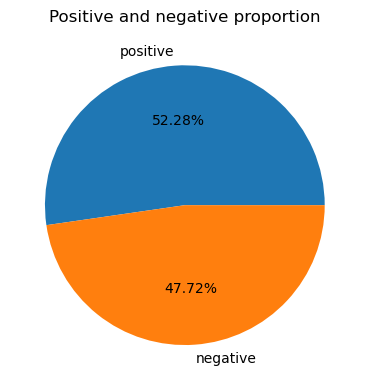

In [72]:
##Plotting a pie chart to visualise the percentage of Positive and Negative reviews.
import matplotlib.pyplot as plt
pie_ = df['Sentiment'].value_counts(normalize = True)
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['positive', 'negative']

plt.pie(pie_, labels=labels, autopct='%.2f%%')
ax.set_title('Positive and negative proportion')
plt.tight_layout()

In [73]:
df.to_csv('sentiment_analysis.csv')

In [ ]:
## Here we can have a look of all those labelled as NEGATIVE. 

In [75]:
df[df['Sentiment'] == 'NEGATIVE']

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Year,translated,Result,Sentiment
1,164789b7-2ab2-493c-9feb-d9cf108a8594,Mohammed Adam,https://play-lh.googleusercontent.com/a/AEdFTp5JKmdnL33HnoLKQtwvPkd--BvQgeknzoe9liMy=mo,انه جملة جدا,5,0,2.7.0,2022-11-15 22:58:19,شكرا لك على التقييم 😍,2022-11-16 00:04:06,2022,It is a very sentence,"[{'label': 'NEGATIVE', 'score': 0.9853544235229492}]",NEGATIVE
2,804b25bf-6f46-4a58-b708-d3e38b40ec6d,Asger Jorn,https://play-lh.googleusercontent.com/a-/AD5-WCnKXOvcDpo-_a9hEE5Rddi0vF1tXfdzOm6xEW83YA,Ordered a TV and it's been 4 days and it's still not delivered. maybe it's a scam,3,0,2.7.0,2022-11-08 21:31:01,kindly send the order number or your mobile number to solve it as soon as possible,2022-11-10 12:15:01,2022,Ordered a TV and it's been 4 days and it's still not delivered. maybe it's a scam,"[{'label': 'NEGATIVE', 'score': 0.9995014667510986}]",NEGATIVE
3,65ec6929-66c1-427d-9bd1-5e43134014c9,Mahmoud Abunada,https://play-lh.googleusercontent.com/a-/AD5-WClKijbSlAXoRBBysfL9bGgJ9bY4w-9KBqUcC1DhpA,نصابين وموقع سرق فلوس ولا يردو عليك ولا يرجعو لك المبلغ ونصيحتي لاحد يتعامل معهم... ناس لا ذمة ولا ضمير مجرد ردود الية بالواتس ورقم الخدمه مغلق والايميل يطنشوك وان رد عليك موظف يقولك رفعت شكوة وبس بدون حل. ماعليكم من التقييم المرتفع كلهم معارف للتطبيق... الموعد يوم الحساب يامحتالين,1,2,2.7.0,2022-11-02 15:47:21,عزيزى العميل نعتذر عن اى مشكلة واجهتك يرجى التواصل عن طريق الواتساب أو الاتصال او الإرسال المباشر عن طريق منصات التواصل الاجتماعي اوقات الدوام من ٩ صباحا حتى ١٢ مساء ويتم الرد على جميع المحادثات خلال اوقات العمل,2022-11-02 18:01:22,2022,"Nisaben and the location of the stealing money and does not respond to you and do not return the amount for you and my advice to someone who deals with them ... People, no edema, no conscience, mere responses with WhatsApp and the service number is closed, and the email will confuse you, and if an employee replied to you, he says you raised suspicion and only a solution.What do you have from the high evaluation are all knowledge of the application ... The appointment is the day of reckoning","[{'label': 'NEGATIVE', 'score': 0.9994962215423584}]",NEGATIVE
5,9880e6a7-4105-4352-bf50-e59cd59921e4,hacker gamer marocoo,https://play-lh.googleusercontent.com/a-/AD5-WCnjcm_gOfRvCjjn6lZwYQfUyxzj2sC2dcClu06Y,Stumble guys pls,1,0,2.5.0,2022-10-09 00:10:13,None,NaT,2022,Stumble guys pls,"[{'label': 'NEGATIVE', 'score': 0.9864626526832581}]",NEGATIVE
6,d29dfcbf-8913-4194-9732-5dfbffe47008,Mouamel Muslem,https://play-lh.googleusercontent.com/a-/AD5-WCm2o1S05s2q-Fu-Q7lNP8jBWz6pEQBA6kp5DajS_A,I can't change my profile pic !!,2,0,2.5.0,2022-10-05 08:30:25,None,NaT,2022,I can't change my profile pic !!,"[{'label': 'NEGATIVE', 'score': 0.9957908391952515}]",NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,94f1e95c-9dd7-4af8-a451-2b11e5593630,Mrs Arif,https://play-lh.googleusercontent.com/a/AEdFTp47oIkFx3vNhK_aPV3t2s87HY_EUA0hqddJUwxZ=mo,ITS AWESOME BUT. I DIDNT GOT MY GIFT OF 25 SAR WT EVER IT WAS. SO THTS RUDE.,2,1,1.0.8,2020-07-24 07:07:56,"Hi Mrs. Arif, We're really sorry you were not able to use the coupon. if you tell us your experience in details we will definitely help you out. here is our Whatsapp number: +966 55 088 0655. Please don't hesitate to contact us. In case we could solve your problem, please come back to update your rating for a better one :)",2020-07-26 16:13:03,2020,ITS AWESOME BUT. I DIDN'T GET MY GIFT OF 25 SAR WT EVER IT WAS. SO THAT'S RUDE.,"[{'label': 'NEGATIVE', 'score': 0.993513286113739}]",NEGATIVE
185,c1858f57-14af-483a-af1e-f3c5c7d48630,قصص خياليه,https://play-lh.googleusercontent.com/a-/AD5-WCmjlnLKiKBCBaHXnPls_x01ggFneP45d8aDFyVFng,خرا,1,2,None,2020-07-22 23:32:51,:(,2020-07-26 16:26:29,2020,it's bad,"[{'label': 'NEGATIVE', 'score': 0.9994187355041504}]",NEGATIVE
190,2254e3bf-f671-411e-8118-ee52ac4d3489,Đŕ. ĒvïŁ,https://play-lh.googleusercontent.com/a-/AD5-WCk6K6yUyehM4O

In [76]:
df[df['Sentiment'] == 'NEGATIVE']['score'].value_counts()

1    70
5     9
2     8
4     4
3     3
Name: score, dtype: int64

In [77]:
## There are 9 'NEGATIVE' values with a rating of 5, and 4 values with a rating of 4. Inspect

In [79]:
cond1 = df['Sentiment'] == 'NEGATIVE'
cond2 = df['score'] > 3 
check_review = df[cond1 & cond2]['translated']
check_review = pd.DataFrame(check_review)
pd.set_option('display.max_colwidth', None)
check_review

,translated
1,It is a very sentence
14,Higher prices xD
44,The app is terrible
45,IH
49,Ok
88,I am changing my review to 1 star from 5 star because of service and delay in my order. I preordered a PS5 game on 6th May...and still not delivered. Every week they inform they will deliver in few days but still I am waiting and it will be almost one month now. Extremely disappointing. I just want to cancel my order now. The game is already available in all markets but La3eb still struggling with the stocks! The game is already in stock in their app.
98,The prices for all of the stuff are all really expensive and overpriced
105,"Just ordered PS5 and all the accessories with it, and I'm waiting."
148,"Guest Paypal, please"
166,"I already preordered the ps5 from this site, but there is really weak service and when ever I message or email i never get a response"


In [85]:
## Seems like there are indeed some negative reviews despite the high rating. 

In [81]:
### There are 5 'POSITIVE' reviews with a rating of 1 and 3 'POSITIVE' reviews with a rating of 2. Lets check it out.
df[df['Sentiment'] == 'POSITIVE']['score'].value_counts()

5    82
4     9
1     5
3     4
2     3
Name: score, dtype: int64

In [83]:
cond1 = df['Sentiment'] == 'POSITIVE'
cond2 = df['score'] < 3 
check_review_pos = df[cond1 & cond2]['translated']
check_review_pos = pd.DataFrame(check_review_pos)
pd.set_option('display.max_colwidth', None)
check_review_pos

,translated
41,Khathanaan
84,"Suddenly, the program stopped and worked"
91,You guys have alot updates
135,"A program that looks very wonderful, but if it supports the products in which the Qatar region will be the most wonderful, such as the store cards and others, I hope that you will add this service and thank you."
146,Apply what works
172,No PayPal pay option. Please add it as soon as possible. Thank you.
179,"The Price to high, I thought I will see something different from the other shops, good luck and I wish if you give good Price for your customers"
188,I hate how everyone can share their YouTube channel .. I have not found any player like me .. only people who want to share their channel


In [84]:
### Seems like the low-rating-'POSITIVE' review is not a negative review after all.

In [99]:
## Installing stopwords to see which words appeared most in both positive and negative review.
!pip install nltk
from nltk.corpus import stopwords

     ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 5.4 MB/s eta 0:00:00


In [102]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SW\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [105]:
stopwords = stopwords.words('english')

In [121]:
import re
from collections import defaultdict

In [146]:
## Getting all the negative reviews into a list.
neg_df = df[df['Sentiment'] == 'NEGATIVE']
neg_list = neg_df['translated'].to_list()

In [136]:
## Counting the number of words appearead in the negative df
dicti = defaultdict()
for sentence in neg_list:
    regex = re.sub(r'[^A-Za-z0-9\s]+', "",sentence)
    regex = sentence.lower()
    for words in regex.split():
        if words not in stopwords:
            if words in dicti:
                dicti[words] += 1
            else:
                dicti[words] = 1
    

In [142]:
## Creating a dataframe to show the number of appearance of words in the negative reviews. 
neg_words_df = pd.DataFrame(dicti.items())
neg_words_df.columns = ['words','count']
neg_words_df = neg_words_df.sort_values(by = 'count', ascending = False).reset_index(drop = True)
neg_words_df.head(5)

,words,count
0,bad,21
1,customer,16
2,service,15
3,app,14
4,application,9


<BarContainer object of 5 artists>

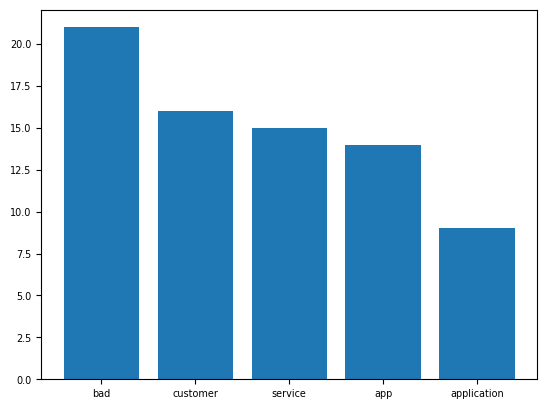

In [144]:
plt.bar(neg_words_df['words'][:5], neg_words_df['count'][:5])

In [145]:
## Looking at the most appeared words in 'NEGATIVE' review
## We can see the negative review might be due to bad customer services and some apps related issue.

In [150]:
## Same procedure for the positive review. 
pos_df = df[df['Sentiment'] == 'POSITIVE']
pos_list = pos_df['translated'].to_list()

In [151]:
dicti_pos = defaultdict()
for sentence in pos_list:
    regex = re.sub(r'[^A-Za-z0-9\s]+', "",sentence)
    regex = sentence.lower()
    for words in regex.split():
        if words not in stopwords:
            if words in dicti_pos:
                dicti_pos[words] += 1
            else:
                dicti_pos[words] = 1
    

In [154]:
pos_words_df = pd.DataFrame(dicti_pos.items())
pos_words_df.columns = ['words','count']
pos_words_df = pos_words_df.sort_values(by = 'count', ascending = False).reset_index(drop = True)
pos_words_df.head(5)

,words,count
0,application,16
1,best,15
2,app,15
3,excellent,11
4,good,11


<BarContainer object of 5 artists>

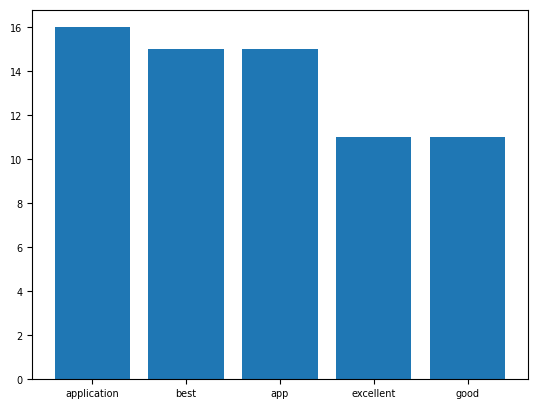

In [155]:
plt.bar(pos_words_df['words'][:5], pos_words_df['count'][:5])

In [ ]:
## Here we can see there are good reviews about the app.

In [159]:
## Out of all the negative reviews, the average score is 1.66
df[df['Sentiment'] == 'NEGATIVE']['score'].mean()

1.6595744680851063

In [160]:
## Out of all the positive reviews, the average score is 4.55
df[df['Sentiment'] == 'POSITIVE']['score'].mean()

4.553398058252427

In [161]:
## Here, we can see the latest version and its average rating.
ratings = df[['score','reviewCreatedVersion']].groupby('reviewCreatedVersion').mean().sort_values(by = 'reviewCreatedVersion', ascending = False).reset_index()
ratings.columns = ['Version','Average Rating']
ratings['Average Rating'] = round(ratings['Average Rating'],1)

In [162]:
ratings.head()

,Version,Average Rating
0,2.7.0,3.0
1,2.6.0,4.0
2,2.5.0,2.8
3,2.3.1,3.0
4,2.3.0,5.0


In [163]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ratings for each version')

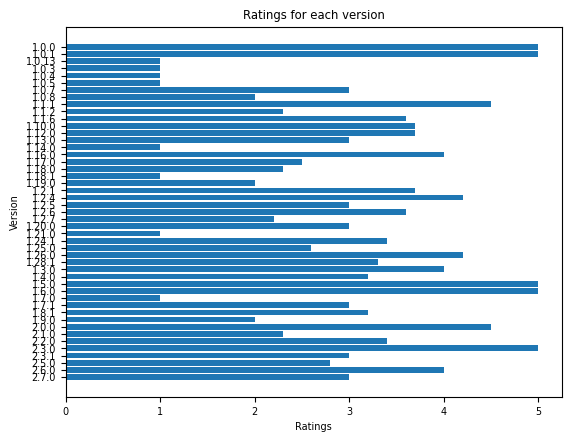

In [164]:
plt.barh(ratings['Version'], ratings['Average Rating'])
plt.rcParams.update({'font.size': 7})
plt.xlabel("Ratings")
plt.ylabel("Version")
plt.title('Ratings for each version')

In [165]:
## Here we can see the number of reviews for each version.
counts = pd.DataFrame(df['reviewCreatedVersion'].value_counts()).reset_index()
counts.columns = ['Version','Count']
counts = counts.sort_values(by = 'Version', ascending = False).reset_index(drop = True)
counts.head()

,Version,Count
0,2.7.0,3
1,2.6.0,1
2,2.5.0,5
3,2.3.1,2
4,2.3.0,1


Text(0.5, 1.0, 'Review counts for each version')

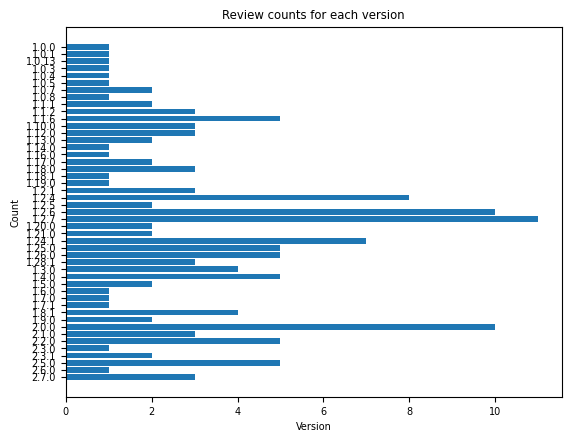

In [166]:
plt.barh(counts['Version'], counts['Count'])
plt.rcParams.update({'font.size': 7})
plt.xlabel("Version")
plt.ylabel("Count")
plt.title('Review counts for each version')

In [167]:
df_version = pd.merge(ratings,counts, on ='Version')
df_version.head()

,Version,Average Rating,Count
0,2.7.0,3.0,3
1,2.6.0,4.0,1
2,2.5.0,2.8,5
3,2.3.1,3.0,2
4,2.3.0,5.0,1


In [168]:
df_version.shape

(47, 3)

In [169]:
df_year = df[['reviewCreatedVersion','Year']].drop_duplicates(subset = 'reviewCreatedVersion', keep = 'first').dropna().reset_index(drop = True)
df_year.columns = ['Version','Year']
df_year.shape

(47, 2)

In [170]:
### Combining to see the version, its average ratings, its number of reviews (count) and the release year. 
df_version = pd.merge(df_version,df_year, on = 'Version')
df_version.head()

,Version,Average Rating,Count,Year
0,2.7.0,3.0,3,2022
1,2.6.0,4.0,1,2022
2,2.5.0,2.8,5,2022
3,2.3.1,3.0,2,2022
4,2.3.0,5.0,1,2022
